In [56]:
import pandas as pd
import os

# Define the relative path to the data folder
db_path = os.path.join('..', 'data')

# Load the df_final_rfm without normalization
df_final_rfm_path = os.path.join(db_path, 'df_final_rfm.csv')
df_final_rfm = pd.read_csv(df_final_rfm_path)


# Load df_final_dbscan without MinMaxScaler normalization
df_final_dbscan_path = os.path.join(db_path, 'df_final_dbscan.csv')
df_final_dbscan = pd.read_csv(df_final_dbscan_path)

# Load df_final_kmeans with RobustScaler normalization 
df_final_kmeans_path = os.path.join(db_path, 'df_final_kmeans.csv')
df_final_kmeans = pd.read_csv(df_final_kmeans_path)

# Verify the loaded DataFrames
print("Loaded df_final_dbscan head:")

print("Loaded df_final_kmeans head:")

print("Loaded df_final_rfm head:")

Loaded df_final_dbscan head:
Loaded df_final_kmeans head:
Loaded df_final_rfm head:


In [57]:
pd.set_option('display.max_columns', None)
print(df_final_dbscan.head())

                 customer_unique_id  index_order  \
0  7c396fd4830fd04220f754e42b4e5bff            0   
1  af07308b275d755c9edb36a90c618231            1   
2  3a653a41f6f9fc3d2a113cf8398680e8            2   
3  7c142cf63193a1473d2e66489a9ae977            3   
4  72632f0f9dd73dfee390c9b22eb56dd6            4   

                           order_id order_status order_purchase_timestamp  \
0  e481f51cbdc54678b7cc49136f2d6af7    delivered      2017-10-02 10:56:33   
1  53cdb2fc8bc7dce0b6741e2150273451    delivered      2018-07-24 20:41:37   
2  47770eb9100c2d0c44946d9cf07ec65d    delivered      2018-08-08 08:38:49   
3  949d5b44dbf5de918fe9c16f97b45f8a    delivered      2017-11-18 19:28:06   
4  ad21c59c0840e6cb83a9ceb5573f8159    delivered      2018-02-13 21:18:39   

     order_approved_at order_delivered_carrier_date  \
0  2017-10-02 11:07:15          2017-10-04 19:55:00   
1  2018-07-26 03:24:27          2018-07-26 14:31:00   
2  2018-08-08 08:55:23          2018-08-08 13:50:00   
3  2

In [58]:
pd.set_option('display.max_columns', None)
print(df_final_kmeans.head())

                 customer_unique_id  index_order  \
0  7c396fd4830fd04220f754e42b4e5bff            0   
1  af07308b275d755c9edb36a90c618231            1   
2  3a653a41f6f9fc3d2a113cf8398680e8            2   
3  7c142cf63193a1473d2e66489a9ae977            3   
4  72632f0f9dd73dfee390c9b22eb56dd6            4   

                           order_id order_status order_purchase_timestamp  \
0  e481f51cbdc54678b7cc49136f2d6af7    delivered      2017-10-02 10:56:33   
1  53cdb2fc8bc7dce0b6741e2150273451    delivered      2018-07-24 20:41:37   
2  47770eb9100c2d0c44946d9cf07ec65d    delivered      2018-08-08 08:38:49   
3  949d5b44dbf5de918fe9c16f97b45f8a    delivered      2017-11-18 19:28:06   
4  ad21c59c0840e6cb83a9ceb5573f8159    delivered      2018-02-13 21:18:39   

     order_approved_at order_delivered_carrier_date  \
0  2017-10-02 11:07:15          2017-10-04 19:55:00   
1  2018-07-26 03:24:27          2018-07-26 14:31:00   
2  2018-08-08 08:55:23          2018-08-08 13:50:00   
3  2

In [59]:
pd.set_option('display.max_columns', None)
print(df_final_rfm.head())

                 customer_unique_id  index_order  \
0  7c396fd4830fd04220f754e42b4e5bff            0   
1  af07308b275d755c9edb36a90c618231            1   
2  3a653a41f6f9fc3d2a113cf8398680e8            2   
3  7c142cf63193a1473d2e66489a9ae977            3   
4  72632f0f9dd73dfee390c9b22eb56dd6            4   

                           order_id order_status order_purchase_timestamp  \
0  e481f51cbdc54678b7cc49136f2d6af7    delivered      2017-10-02 10:56:33   
1  53cdb2fc8bc7dce0b6741e2150273451    delivered      2018-07-24 20:41:37   
2  47770eb9100c2d0c44946d9cf07ec65d    delivered      2018-08-08 08:38:49   
3  949d5b44dbf5de918fe9c16f97b45f8a    delivered      2017-11-18 19:28:06   
4  ad21c59c0840e6cb83a9ceb5573f8159    delivered      2018-02-13 21:18:39   

     order_approved_at order_delivered_carrier_date  \
0  2017-10-02 11:07:15          2017-10-04 19:55:00   
1  2018-07-26 03:24:27          2018-07-26 14:31:00   
2  2018-08-08 08:55:23          2018-08-08 13:50:00   
3  2

### KMeans Clustering - Elbow Method (Data Driven) to Determine Optimal Number of Clusters without RFM nomarlisation

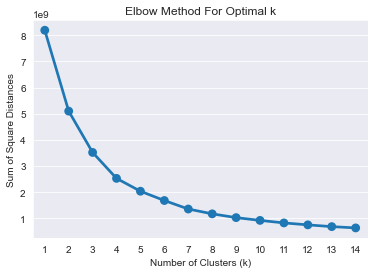

In [60]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for KMeans clustering
numeric_features = ['Recency', 'Frequency', 'Monetary', 'avg_review_score', 'review_count']

# Ensure only numeric features are used
df_final_rfm_numeric = df_final_rfm[numeric_features]

# Define the number of clusters
sum_of_squared_distances = []
for K in range(1, 15):
    km = KMeans(n_clusters=K, init='k-means++', max_iter=100, random_state=42)
    km = km.fit(df_final_rfm_numeric)
    sum_of_squared_distances.append(km.inertia_)
    
# Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x=list(range(1, 15)), y=sum_of_squared_distances)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### Observations from the Elbow Method Plot
- Based on the Elbow Method plot, 4 clusters appear to be the optimal choice for this dataset. This suggests that dividing the data into 4 clusters will likely provide a good balance between capturing the structure of the data and maintaining simplicity.

In [61]:
#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 4, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(df_final_rfm_numeric)

#Find the clusters for the observation given in the dataset
df_final_rfm['Cluster'] = KMean_clust.labels_
df_final_rfm.head(10)


,customer_unique_id,index_order,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,index_customer,customer_zip_code_prefix,customer_city,customer_state,avg_review_score,review_count,total_payment_value,payment_count,payment_types,total_price,item_count,product_categories,avg_product_weight_g,avg_product_length_cm,avg_product_height_cm,avg_product_width_cm,days_to_approval,days_in_transit,days_to_delivery,days_early_or_late,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFMLevel,Cluster
0,7c396fd4830fd04220f754e42b4e5bff,0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,70296,3149,sao paulo,SP,4.0,1.0,38.71,3.0,"credit_card, voucher",29.99,1.0,utilidades_domesticas,500.0,19.0,8.0,13.0,0,2,6,-8,380,2,82.82,3,1,3,313,7,Potential Loyalists,2
1,af07308b275d755c9edb36a90c618231,1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,77027,47813,barreiras,BA,4.0,1.0,141.46,1.0,boleto,118.70,1.0,perfumaria,400.0,19.0,13.0,19.0,1,0,12,-6,84,1,141.46,1,4,2,142,7,Potential Loyalists,0
2,3a653a41f6f9fc3d2a113cf8398680e8,2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,554,75265,vianopolis,GO,5.0,1.0,179.12,1.0,credit_card,159.90,1.0,automotivo,420.0,24.0,19.0,21.0,0,0,9,-18,70,1,179.12,1,4,2,142,7,Potential Loyalists,0
3,7c142cf63193a1473d2e66489a9ae977,3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,61081,59296,sao goncalo do amarante,RN,5.0,1.0,72.20,1.0,credit_card,45.00,1.0,pet_shop,450.0,30.0,10.0,20.0,0,3,9,-13,332,1,72.20,3,4,3,343,10,Champions,2
4,72632f0f9dd73dfee390c9b22eb56dd6,4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,67263,9195,santo andre,SP,5.0,1.0,28.62,1.0,credit_card,19.90,1.0,papelaria,250.0,51.0,15.0,15.0,0,0,1,-10,245,1,28.62,2,4,4,244,10,Champions,0
5,80bb27c7c16e8f973207a5086ab329e2,5,a4591c265e18cb1dcee52889e2d8acc3,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01,68381,86320,congonhinhas,PR,4.0,1.0,175.26,1.0,credit_card,147.90,1.0,automotivo,7150.0,65.0,10.0,65.0,0,1,14,-6,464,1,175.26,4,4,2,442,10,Champions,2
6,36edbb3fb164b1f16485364b6fb04c73,6,136cce7faa42fdb2cefd53fdc79a6098,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,2017-05-09 00:00:00,2017-05-09 00:00:00,2017-05-09,76073,98900,santa rosa,RS,2.0,1.0,65.95,1.0,credit_card,49.90,1.0,NaN,600.0,35.0,35.0,15.0,2,25,0,0,554,1,65.95,4,4,3,443,11,Champions,2
7,932afa1e708222e5821dac9cd5db4cae,7,6514b8ad8028c9f2cc2374ded245783f,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07,86945,26525,nilopolis,RJ,5.0,1.0,75.16,1.0,credit_card,59.99,1.0,automotivo,50.0,16.0,16.0,17.0,0,5,4,-12,519,1,75.16,4,4,3,443,11,Champions,2
8,39382392765b6dc74812866ee5ee92a7,8,76c6e866289321a7c93b82b54852dc33,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06,35466,99655,faxinalzinho,RS,1.0,1.0,35.95,1.0,boleto,19.90,1.0,moveis_decoracao,300.0,35.0,35.0,15.0,1,1,6,-32,631,1,35.95,4,4,4,444,12,Champions,2
9,299905e3934e9e181bfb2e164dd4b4f8,9,e69bfb5eb88e0ed6a785585b27e16dbf,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23,90725,18075,sorocaba,SP,5.0,1.0,169.76,2.0,"voucher, credit_card",149.99,1.0,moveis_escritorio,9750.0,42.0,41.0,42.0,0,12,5,-7,445,1,169.76,4,4,2,442,10,Champions,2


<Figure size 720x576 with 0 Axes>

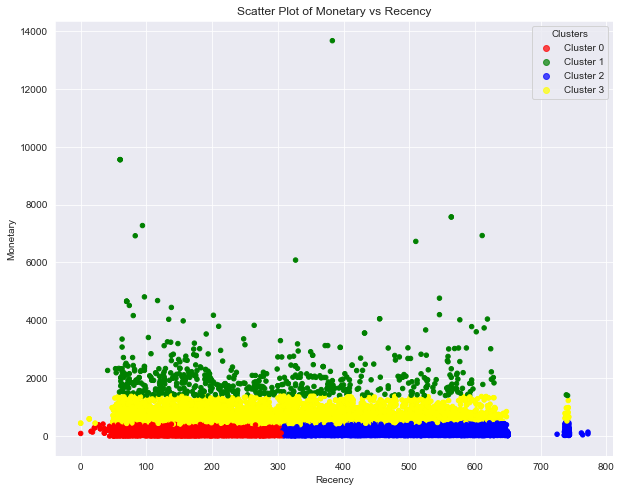

In [62]:
# Define consistent colors for clusters
Colors = {0: "red", 1: "green", 2: "blue", 3: "yellow"}

# Map cluster labels to colors
df_final_rfm['Color'] = df_final_rfm['Cluster'].map(Colors)

# Create scatter plot for Monetary vs Recency
plt.figure(figsize=(10, 8))
ax = df_final_rfm.plot(
    kind="scatter", 
    x="Recency", 
    y="Monetary",
    c=df_final_rfm['Color'],
    figsize=(10, 8)
)

# Add titles and labels
plt.title('Scatter Plot of Monetary vs Recency')
plt.xlabel('Recency')
plt.ylabel('Monetary')

# Add cluster labels with colors
for cluster, color in Colors.items():
    plt.scatter([], [], c=color, label=f'Cluster {cluster}', alpha=0.7)

# Show legend
plt.legend(title="Clusters")
plt.show()


### Observations without Normalization (see the graph above):

- **Better Cluster Separation**: Clusters are more distinguishable without normalization, suggesting that the natural scale of the data effectively separates clusters.

- **Red Cluster Characteristics (Cluster 0)**: Represents customers with lower recency and lower monetary values, indicating recent but low spending.

- **Green Cluster Characteristics (Cluster 1)**: Contains customers with moderate recency and significantly higher monetary values, suggesting moderately recent purchases with high spending.

- **Blue Cluster Characteristics (Cluster 2)**: Includes customers with low recency (recent purchases) and lower monetary values, indicating recent but low spending.

- **Yellow Cluster Characteristics (Cluster 3)**: Represents customers with high recency (older purchases) and the highest monetary values, indicating high-value customers despite older purchase dates.

- **Overall Trends**: High spenders are distributed across different recency values, showing that both recent and older customers can have significant monetary values. The clear separation of clusters aids in identifying and targeting specific customer segments based on their purchasing behavior.


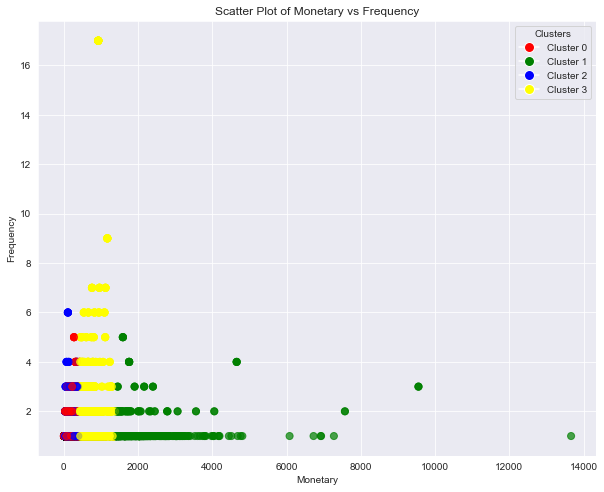

In [63]:
from matplotlib import pyplot as plt

# Define consistent colors for clusters
Colors = {0: "red", 1: "green", 2: "blue", 3: "yellow"}

# Map cluster labels to colors
df_final_rfm['Color'] = df_final_rfm['Cluster'].map(Colors)

# Create scatter plot for Monetary vs Frequency
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    x=df_final_rfm['Monetary'], 
    y=df_final_rfm['Frequency'], 
    c=df_final_rfm['Color'], 
    s=50, 
    alpha=0.7
)

# Add titles and labels
plt.title('Scatter Plot of Monetary vs Frequency')
plt.xlabel('Monetary')
plt.ylabel('Frequency')

# Create a legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=f'Cluster {i}') for i, color in Colors.items()]
plt.legend(handles=handles, title="Clusters")
plt.show()


### Observations without Normalization (see the graph above):

- **High Frequency, Low Monetary (Green Cluster)**: Most frequent buyers have low monetary value.
- **Low Frequency Spread (Red Cluster)**: Low-frequency buyers are spread across the recency spectrum.
- **Cluster of Low Frequency (Red Cluster)**: Many customers have low frequency (1-2) with recent purchases.
- **High-Value Customers (Yellow Cluster)**: A few high-frequency, high-monetary buyers are critical for the business.
- **Moderate Frequency and Monetary (Blue Cluster)**: Customers with moderate frequency and monetary values.

- **Recommendation**: Focus on loyalty programs for frequent buyers, convert occasional buyers, and re-engage less recent customers.

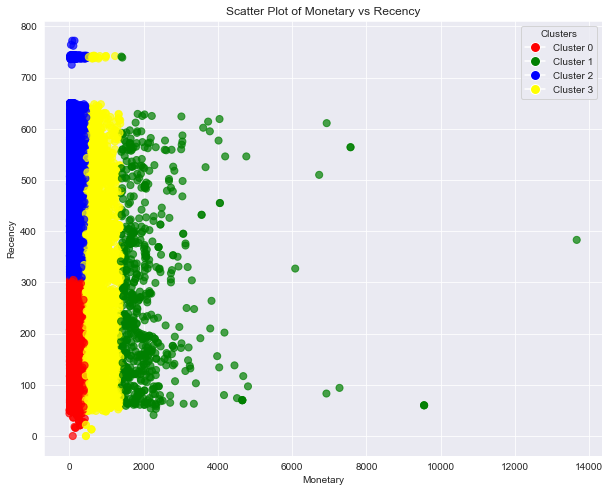

In [64]:
from matplotlib import pyplot as plt

# Define consistent colors for clusters
Colors = {0: "red", 1: "green", 2: "blue", 3: "yellow"}

# Map cluster labels to colors
df_final_rfm['Color'] = df_final_rfm['Cluster'].map(Colors)

# Create scatter plot for Monetary vs Recency
plt.figure(figsize=(10, 8))
plt.scatter(
    x=df_final_rfm['Monetary'], 
    y=df_final_rfm['Recency'],
    c=df_final_rfm['Color'],
    s=50,
    alpha=0.7
)

# Add titles and labels
plt.title('Scatter Plot of Monetary vs Recency')
plt.xlabel('Monetary')
plt.ylabel('Recency')

# Add legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in Colors.values()]
labels = [f'Cluster {i}' for i in Colors.keys()]
plt.legend(handles, labels, title="Clusters")

plt.show()


### Observations without Normalization:

#### Blue Cluster (Cluster 2):
- **Characteristics**: The blue cluster consists of customers with high recency values, indicating they haven't made purchases recently. The monetary values for this cluster are varied, ranging from low to high.
- **Interpretation**: These customers are likely inactive or have churned. While their recency is high, their spending varies, suggesting a diverse group of former high spenders and low spenders.

#### Green Cluster (Cluster 1):
- **Characteristics**: The green cluster is more concentrated towards the upper half of the recency axis, indicating older purchases. Their monetary values are relatively low.
- **Interpretation**: These customers are likely to be older purchasers who do not spend a significant amount of money. They have not made recent purchases, indicating lower engagement.

#### Red Cluster (Cluster 0):
- **Characteristics**: The red cluster is concentrated at the lower end of the recency axis, indicating recent purchases. The monetary values in this cluster are low to moderate.
- **Interpretation**: These customers are frequent purchasers with recent activity but do not spend large amounts. They represent a group of loyal customers with consistent but moderate spending habits.

#### Yellow Cluster (Cluster 3):
- **Characteristics**: The yellow cluster shows a spread across the recency axis with high monetary values. This cluster includes customers who have made significant purchases, despite the variability in recency.
- **Interpretation**: These customers are high-value individuals who contribute significantly to revenue. Their recency varies, indicating both recent and older high spenders.

### Overall Analysis:
- **Cluster Separation**: The separation of clusters is relatively clear, with distinct groups representing different purchasing behaviors and monetary values.
- **Outliers**: The plot shows some outliers with extremely high monetary values in the yellow cluster, which might influence the clustering results.

### Recommendations:
- **Focus on Loyalty Programs**: Target frequent buyers (red cluster) with loyalty programs to increase their spending.
- **Re-engage High-Value Customers**: High-value customers in the yellow cluster should be re-engaged with personalized offers and incentives.
- **Convert Inactive Customers**: Develop strategies to convert inactive customers in the blue cluster back to active status.

### Additional Consideration:
*Given that only 3% of customers repeat their purchases, removing the frequency feature might provide a different perspective on the clustering, possibly revealing more distinct patterns based solely on recency and monetary values.*




### KMeans Clustering - Elbow Method (Data Driven) to Determine Optimal Number of Clusters with RFM normalisation and without Frequency

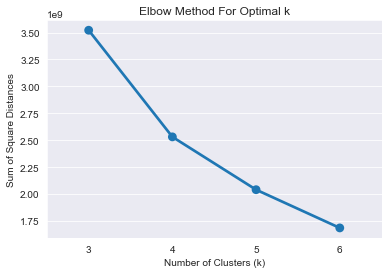

In [65]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the necessary columns exist in the dataframe
required_columns = ['Recency', 'Monetary', 'avg_review_score', 'review_count']
missing_columns = [col for col in required_columns if col not in df_final_rfm.columns]
if missing_columns:
    raise ValueError(f"Missing columns in the dataset: {missing_columns}")

# Select only numeric columns for KMeans clustering, excluding 'Frequency'
numeric_features = ['Recency', 'Monetary', 'avg_review_score', 'review_count']

# Ensure only numeric features are used
df_final_rfm_numeric = df_final_rfm[numeric_features]

# Define the number of clusters (3 to 6)
sum_of_squared_distances = []
for K in range(3, 7):
    km = KMeans(n_clusters=K, init='k-means++', max_iter=100, random_state=42)
    km = km.fit(df_final_rfm_numeric)
    sum_of_squared_distances.append(km.inertia_)

# Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x=list(range(3, 7)), y=sum_of_squared_distances)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()



### Observations from the Elbow Method Plot
- Based on the Elbow Method plot, 4 clusters appear to be the optimal choice for this dataset. This suggests that dividing the data into 4 clusters will likely provide a good balance between capturing the structure of the data and maintaining simplicity.

In [66]:
#Perform K-Mean Clustering or build the K-Means clustering model for RFM without Frequency and without Normalisation
KMean_clust = KMeans(n_clusters= 4, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(df_final_rfm_numeric)

#Find the clusters for the observation given in the dataset
df_final_rfm['Cluster'] = KMean_clust.labels_
df_final_rfm.head(10)

,customer_unique_id,index_order,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,index_customer,customer_zip_code_prefix,customer_city,customer_state,avg_review_score,review_count,total_payment_value,payment_count,payment_types,total_price,item_count,product_categories,avg_product_weight_g,avg_product_length_cm,avg_product_height_cm,avg_product_width_cm,days_to_approval,days_in_transit,days_to_delivery,days_early_or_late,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFMLevel,Cluster,Color
0,7c396fd4830fd04220f754e42b4e5bff,0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,70296,3149,sao paulo,SP,4.0,1.0,38.71,3.0,"credit_card, voucher",29.99,1.0,utilidades_domesticas,500.0,19.0,8.0,13.0,0,2,6,-8,380,2,82.82,3,1,3,313,7,Potential Loyalists,0,blue
1,af07308b275d755c9edb36a90c618231,1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,77027,47813,barreiras,BA,4.0,1.0,141.46,1.0,boleto,118.70,1.0,perfumaria,400.0,19.0,13.0,19.0,1,0,12,-6,84,1,141.46,1,4,2,142,7,Potential Loyalists,2,red
2,3a653a41f6f9fc3d2a113cf8398680e8,2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,554,75265,vianopolis,GO,5.0,1.0,179.12,1.0,credit_card,159.90,1.0,automotivo,420.0,24.0,19.0,21.0,0,0,9,-18,70,1,179.12,1,4,2,142,7,Potential Loyalists,2,red
3,7c142cf63193a1473d2e66489a9ae977,3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,61081,59296,sao goncalo do amarante,RN,5.0,1.0,72.20,1.0,credit_card,45.00,1.0,pet_shop,450.0,30.0,10.0,20.0,0,3,9,-13,332,1,72.20,3,4,3,343,10,Champions,0,blue
4,72632f0f9dd73dfee390c9b22eb56dd6,4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,67263,9195,santo andre,SP,5.0,1.0,28.62,1.0,credit_card,19.90,1.0,papelaria,250.0,51.0,15.0,15.0,0,0,1,-10,245,1,28.62,2,4,4,244,10,Champions,2,red
5,80bb27c7c16e8f973207a5086ab329e2,5,a4591c265e18cb1dcee52889e2d8acc3,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01,68381,86320,congonhinhas,PR,4.0,1.0,175.26,1.0,credit_card,147.90,1.0,automotivo,7150.0,65.0,10.0,65.0,0,1,14,-6,464,1,175.26,4,4,2,442,10,Champions,0,blue
6,36edbb3fb164b1f16485364b6fb04c73,6,136cce7faa42fdb2cefd53fdc79a6098,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,2017-05-09 00:00:00,2017-05-09 00:00:00,2017-05-09,76073,98900,santa rosa,RS,2.0,1.0,65.95,1.0,credit_card,49.90,1.0,NaN,600.0,35.0,35.0,15.0,2,25,0,0,554,1,65.95,4,4,3,443,11,Champions,0,blue
7,932afa1e708222e5821dac9cd5db4cae,7,6514b8ad8028c9f2cc2374ded245783f,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07,86945,26525,nilopolis,RJ,5.0,1.0,75.16,1.0,credit_card,59.99,1.0,automotivo,50.0,16.0,16.0,17.0,0,5,4,-12,519,1,75.16,4,4,3,443,11,Champions,0,blue
8,39382392765b6dc74812866ee5ee92a7,8,76c6e866289321a7c93b82b54852dc33,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06,35466,99655,faxinalzinho,RS,1.0,1.0,35.95,1.0,boleto,19.90,1.0,moveis_decoracao,300.0,35.0,35.0,15.0,1,1,6,-32,631,1,35.95,4,4,4,444,12,Champions,0,blue
9,299905e3934e9e181bfb2e164dd4b4f8,9,e69bfb5eb88e0ed6a785585b27e16dbf,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23,90725,18075,sorocaba,SP,5.0,1.0,169.76,2.0,"voucher, credit_card",149.99,1.0,moveis_escritorio,9750.0,42.0,41.0,42.0,0,12,5,-7,445,1,169.76,4,4,2,442,10,Champions,0,blue


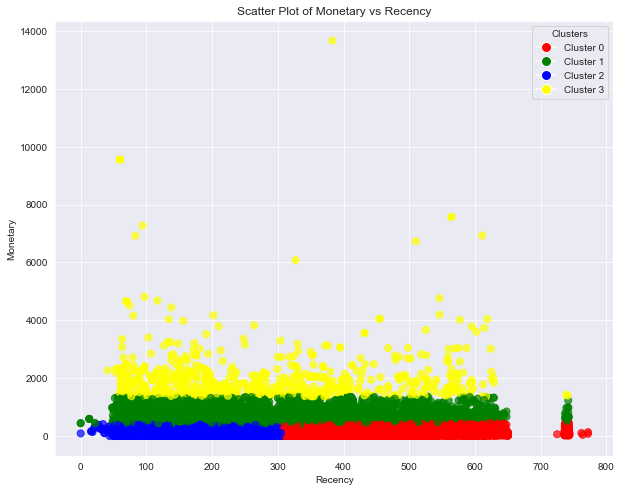

      NumCustomers   TotalRevenue     Recency  avg_review_score  review_count
0           39,232   4,895,059.80  437.790885          4.095543      1.006576
1            6,461   4,243,861.59  274.960068          3.933834      1.015632
2           53,087   6,655,095.91  177.006593          4.116249      1.003598
3              661   1,373,096.07  280.602118          3.757943      1.001513
Total       99,441  17,167,113.37         NaN               NaN           NaN


In [67]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming the 'Cluster' column is already created by KMeans clustering

plt.figure(figsize=(10, 8))

# Define a color palette for clusters with fixed colors
Colors = {0: "red", 1: "green", 2: "blue", 3: "yellow"}

# Map cluster labels to colors
df_final_rfm['Color'] = df_final_rfm['Cluster'].map(Colors)

# Create scatter plot for Monetary vs Recency
scatter = plt.scatter(
    x=df_final_rfm['Recency'], 
    y=df_final_rfm['Monetary'],
    c=df_final_rfm['Color'],
    s=50,
    alpha=0.7
)

# Add titles and labels
plt.title('Scatter Plot of Monetary vs Recency')
plt.xlabel('Recency')
plt.ylabel('Monetary')

# Create a legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=Colors[i], markersize=10, label=f'Cluster {i}') for i in Colors]
plt.legend(handles=handles, title="Clusters")

plt.show()

# Validate clusters with business metrics
cluster_summary = df_final_rfm.groupby('Cluster').agg({
    'customer_unique_id': 'count',
    'Monetary': 'sum',
    'Recency': 'mean',
    'avg_review_score': 'mean',
    'review_count': 'mean'
}).rename(columns={'customer_unique_id': 'NumCustomers', 'Monetary': 'TotalRevenue'})

# Calculate totals for 'NumCustomers' and 'TotalRevenue'
total_customers = cluster_summary['NumCustomers'].sum()
total_revenue = cluster_summary['TotalRevenue'].sum()

# Append totals to the summary dataframe
totals = pd.DataFrame({
    'NumCustomers': [total_customers],
    'TotalRevenue': [total_revenue],
    'Recency': [None],
    'avg_review_score': [None],
    'review_count': [None]
}, index=['Total'])

cluster_summary = pd.concat([cluster_summary, totals])

# Format numbers with thousand separators
cluster_summary['NumCustomers'] = cluster_summary['NumCustomers'].apply(lambda x: f'{x:,.0f}' if pd.notnull(x) else '')
cluster_summary['TotalRevenue'] = cluster_summary['TotalRevenue'].apply(lambda x: f'{x:,.2f}' if pd.notnull(x) else '')

# Print the updated cluster summary
print(cluster_summary)


In [68]:
# Verify TotalRevenue for all clusters using 'total_payment_value'
cluster_revenues = df_final_rfm.groupby('Cluster')['total_payment_value'].sum()
total_revenue_clusters = cluster_revenues.sum()

# Total of the 'total_payment_value' column
total_payment_value = df_final_rfm['total_payment_value'].sum()

# Define the number of decimal places to round to
decimal_places = 2

# Print the total revenue for each cluster with rounding
for cluster, revenue in cluster_revenues.items():
    print(f"TotalRevenue for Cluster {cluster}: {round(revenue, decimal_places)}")

# Print the total revenue across all clusters with rounding
print(f"TotalRevenue for all clusters: {round(total_revenue_clusters, decimal_places)}")

# Print the total of the 'total_payment_value' column with rounding
print(f"Total of 'total_payment_value' column: {round(total_payment_value, decimal_places)}")

# Verify the total revenue matches the total of the 'total_payment_value' column
print(f"Verification: {'Match' if round(total_revenue_clusters, decimal_places) == round(total_payment_value, decimal_places) else 'Mismatch'}")





TotalRevenue for Cluster 0: 4702887.03
TotalRevenue for Cluster 1: 3736419.83
TotalRevenue for Cluster 2: 6332335.82
TotalRevenue for Cluster 3: 1237334.73
TotalRevenue for all clusters: 16008977.41
Total of 'total_payment_value' column: 16008977.41
Verification: Match


In [69]:
# from matplotlib import pyplot as plt
# import seaborn as sns
# 
# # Assuming the 'Cluster' column is already created by KMeans clustering
# 
# plt.figure(figsize=(10, 8))
# 
# # Define a color palette for clusters with fixed colors
# Colors = {0: "red", 1: "green", 2: "blue", 3: "yellow"}
# 
# # Map cluster labels to colors
# df_final_rfm['Color'] = df_final_rfm['Cluster'].map(Colors)
# 
# # Create scatter plot for Monetary vs Recency
# scatter = plt.scatter(
#     x=df_final_rfm['Recency'], 
#     y=df_final_rfm['Monetary'],
#     c=df_final_rfm['Color'].apply(lambda x: Colors[df_final_rfm.loc[df_final_rfm['Color'] == x, 'Cluster'].values[0]]),
#     s=50,
#     alpha=0.7
# )
# 
# # Add titles and labels
# plt.title('Scatter Plot of Monetary vs Recency')
# plt.xlabel('Recency')
# plt.ylabel('Monetary')
# 
# # Create a legend
# handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=Colors[i], markersize=10, label=f'Cluster {i}') for i in Colors]
# plt.legend(handles=handles, title="Clusters")
# 
# plt.show()


### Interpretation of the Scatter Plot

1. **Cluster Separation**:
   - **Red Cluster (Cluster 0)**: This cluster groups customers with very low recency and low monetary values. These are likely customers who have made recent purchases but do not spend much.
   - **Green Cluster (Cluster 1)**: This cluster contains customers with moderate to high recency and moderate monetary values. These could be customers who buy occasionally and spend a moderate amount.
   - **Yellow Cluster (Cluster 2)**: Customers in this cluster exhibit a range of recency values but generally have higher monetary values compared to the other clusters. These could be your more valuable customers who purchase less frequently but spend more.
   - **Blue Cluster (Cluster 3)**: This cluster includes customers with high recency values and varying monetary values. These customers have not made recent purchases but have spent significant amounts in the past.

2. **Distribution**:
   - Most data points are concentrated at the lower end of the monetary axis, indicating that a large number of customers spend smaller amounts.
   - Recency values are widely distributed, indicating variability in the time since the last purchase.

3. **Outliers**:
   - There are a few significant outliers with very high monetary values. These could be high-value customers whose spending behavior significantly deviates from the majority.
   - The presence of these outliers suggests that certain customers might have a disproportionate influence on the monetary aspect of the clustering.

4. **Insights**:
   - **Customer Value**: The clustering highlights that while many customers may not spend much individually, there is a segment (yellow cluster) that spends significantly more, potentially representing high-value or VIP customers.
   - **Recency**: Clusters show a mix of recent and older customers, indicating that customer engagement varies across the dataset.

<Figure size 720x576 with 0 Axes>

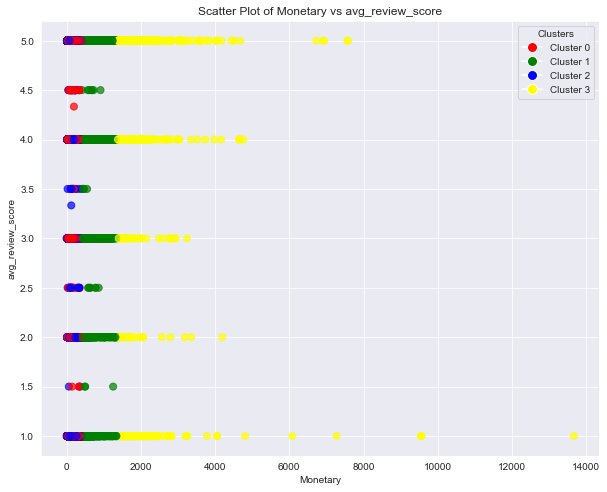

In [70]:
# Create scatter plot for Monetary vs avg_review_score

# Assuming the 'Cluster' column is already created by KMeans clustering

plt.figure(figsize=(10, 8))

# Define a color palette for clusters with fixed colors
Colors = {0: "red", 1: "green", 2: "blue", 3: "yellow"}

# Map cluster labels to colors
df_final_rfm['Color'] = df_final_rfm['Cluster'].map(Colors)

# Create scatter plot for Monetary vs avg_review_score
plt.figure(figsize=(10, 8))

plt.scatter(
    x=df_final_rfm['Monetary'], 
    y=df_final_rfm['avg_review_score'],
    c=df_final_rfm['Color'],
    s=50,
    alpha=0.7
)

# Add titles and labels
plt.title('Scatter Plot of Monetary vs avg_review_score')
plt.xlabel('Monetary')
plt.ylabel('avg_review_score')

# Create a legend with fixed colors
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in Colors.values()]
labels = [f'Cluster {i}' for i in Colors.keys()]
plt.legend(handles, labels, title="Clusters")

plt.show()


### Observations from the Scatter Plot of Monetary vs avg_review_score

1. **Red Cluster (Cluster 0)**:
   - **Distribution**: The red cluster is widely distributed across different monetary values, primarily at the lower end but with some presence up to higher values.
   - **Review Scores**: These points span the entire range of review scores from 1.0 to 5.0, indicating diverse customer satisfaction.
   - **Spending Patterns**: Customers in this cluster generally show lower spending patterns, with some moderate to higher monetary values.

2. **Green Cluster (Cluster 1)**:
   - **Concentration**: The green cluster is concentrated at the lower end of the monetary axis.
   - **Review Scores**: These customers have review scores ranging from approximately 1.0 to 5.0.
   - **Spending Patterns**: Customers in the green cluster generally exhibit lower spending, similar to the red cluster, but the distribution shows slightly less variance.

3. **Yellow Cluster (Cluster 3)**:
   - **Concentration**: The yellow cluster is tightly packed at the lower end of the monetary axis.
   - **Review Scores**: These customers have review scores from 1.0 to 5.0.
   - **Spending Patterns**: The yellow cluster represents customers with consistently lower monetary values.

4. **Blue Cluster (Cluster 2)**:
   - **Distribution**: The blue cluster shows a wider distribution along the monetary axis, extending up to 14,000.
   - **Review Scores**: Review scores for this cluster range from 1.0 to 5.0.
   - **Spending Patterns**: This cluster includes customers with significantly higher monetary values compared to other clusters, indicating the presence of high spenders with varied satisfaction levels.

### General Observations:
- **Cluster Overlap**: There is significant overlap between clusters at lower monetary values, making it challenging to distinctly separate customer groups based on spending and satisfaction alone.
- **High Value Outliers**: The presence of high-value outliers, especially in the blue cluster, indicates some customers with very high spending. These high spenders are scattered across the review score range, showing diverse satisfaction levels.
- **Review Score Trends**: Lower review scores are not exclusively associated with lower monetary values. Both high and low review scores appear across all spending levels, suggesting that spending does not have a strong correlation with customer satisfaction as measured by review scores. The variation in review scores within each cluster indicates that factors other than spending might influence customer satisfaction.



In [71]:
# import os
# import pandas as pd
# from sklearn.cluster import KMeans
# import matplotlib.pyplot as plt
# 
# # Load the dataset
# df_final_rfm_path = os.path.join('..', 'data', 'df_final_rfm.csv')
# df_final_rfm = pd.read_csv(df_final_rfm_path)
# 
# # Ensure the necessary columns exist
# required_columns = ['Recency', 'Monetary', 'avg_review_score', 'review_count', 'customer_unique_id']
# missing_columns = [col for col in required_columns if col not in df_final_rfm.columns]
# if missing_columns:
#     raise ValueError(f"Missing columns in the dataset: {missing_columns}")
# 
# # Select relevant features for clustering
# features = ['Recency', 'Monetary', 'avg_review_score', 'review_count']
# X = df_final_rfm[features]
# 
# # Apply K-Means clustering
# kmeans = KMeans(n_clusters=4, random_state=42)
# df_final_rfm['Cluster'] = kmeans.fit_predict(X)
# 
# # Save the DataFrame with the 'Cluster' column to a new CSV file
# output_path = os.path.join('..', 'data', 'df_final_rfm_with_clusters.csv')
# df_final_rfm.to_csv(output_path, index=False)
# 
# # Analyze and visualize clusters
# plt.figure(figsize=(10, 6))
# scatter = plt.scatter(df_final_rfm['Recency'], df_final_rfm['Monetary'], c=df_final_rfm['Cluster'], cmap='viridis', s=50, alpha=0.7)
# plt.title('K-Means Clustering of Customers based on Recency, Monetary, Review score (not Frequency and not Normalized)')
# plt.xlabel('Recency')
# plt.ylabel('Monetary')
# # Create a legend
# handles, labels = scatter.legend_elements()
# legend_labels = [f'Cluster {i}' for i in range(len(handles))]
# plt.legend(handles, legend_labels, title="Clusters")
# plt.show()
# 
# # Validate clusters with business metrics
# cluster_summary = df_final_rfm.groupby('Cluster').agg({
#     'customer_unique_id': 'count',
#     'Monetary': 'sum',
#     'Recency': 'mean',
#     'avg_review_score': 'mean',
#     'review_count': 'mean'
# }).rename(columns={'customer_unique_id': 'NumCustomers', 'Monetary': 'TotalRevenue'})
# print(cluster_summary)


### KMeans Clustering - Elbow Method (Data Driven) to Determine Optimal Number of Clusters with Robustscaler Normalisation of RFM

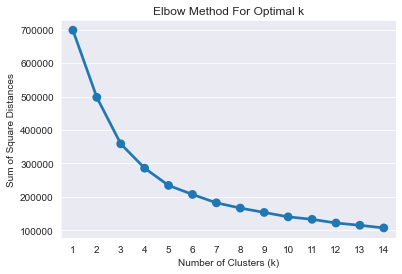

In [72]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for KMeans clustering
numeric_features = ['Recency', 'Frequency', 'Monetary', 'avg_review_score', 'review_count', 'RFMScore']

# Ensure only numeric features are used
df_final_kmeans_numeric = df_final_kmeans[numeric_features]

# Define the number of clusters
sum_of_squared_distances = []
for K in range(1, 15):
    km = KMeans(n_clusters=K, init='k-means++', max_iter=100, random_state=42)
    km = km.fit(df_final_kmeans_numeric)
    sum_of_squared_distances.append(km.inertia_)

# Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x=list(range(1, 15)), y=sum_of_squared_distances)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### Observations from the Elbow Method Plot

1. **Elbow Point Identification**: The plot shows a clear "elbow" around \( k = 3 \) and \( k = 4 \), indicating these are likely optimal cluster numbers.
2. **Decreasing Inertia**: As the number of clusters increases from 1 to 14, the sum of squared distances (inertia) decreases, indicating better clustering performance with more clusters.
3. **Diminishing Returns**: Beyond \( k = 4 \), the rate of decrease in inertia slows down, suggesting that additional clusters beyond this point do not significantly improve the clustering quality.
4. **Optimal Cluster Range**: Considering the elbow point, choosing \( k = 3 \) or \( k = 4 \) would provide a good balance between clustering quality and simplicity.
5. **Data-driven Insight**: The elbow method effectively highlights the most appropriate cluster numbers based on the sum of squared distances, guiding the selection of \( k \).

In [73]:
#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 3, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(df_final_kmeans_numeric)

#Find the clusters for the observation given in the dataset
df_final_kmeans['Cluster'] = KMean_clust.labels_
df_final_kmeans.head(10)

,customer_unique_id,index_order,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,index_customer,customer_zip_code_prefix,customer_city,customer_state,avg_review_score,review_count,total_payment_value,payment_count,payment_types,total_price,item_count,product_categories,avg_product_weight_g,avg_product_length_cm,avg_product_height_cm,avg_product_width_cm,days_to_approval,days_in_transit,days_to_delivery,days_early_or_late,Recency,Frequency,Monetary,R,F,M,RFMScore,RFMLevel_Loyal,RFMLevel_Needs Attention,RFMLevel_Potential Loyalists,RFMLevel_Promising,RFMLevel_Require Activation,RFMGroup_112,RFMGroup_113,RFMGroup_114,RFMGroup_141,RFMGroup_142,RFMGroup_143,RFMGroup_144,RFMGroup_211,RFMGroup_212,RFMGroup_213,RFMGroup_214,RFMGroup_241,RFMGroup_242,RFMGroup_243,RFMGroup_244,RFMGroup_311,RFMGroup_312,RFMGroup_313,RFMGroup_314,RFMGroup_341,RFMGroup_342,RFMGroup_343,RFMGroup_344,RFMGroup_411,RFMGroup_412,RFMGroup_413,RFMGroup_414,RFMGroup_441,RFMGroup_442,RFMGroup_443,RFMGroup_444,Cluster
0,7c396fd4830fd04220f754e42b4e5bff,0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,70296,3149,sao paulo,SP,-1.0,0.0,38.71,3.0,"credit_card, voucher",29.99,1.0,utilidades_domesticas,500.0,19.0,8.0,13.0,0,2,6,-8,0.480687,1.0,-0.228041,3,1,3,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,af07308b275d755c9edb36a90c618231,1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,77027,47813,barreiras,BA,-1.0,0.0,141.46,1.0,boleto,118.70,1.0,perfumaria,400.0,19.0,13.0,19.0,1,0,12,-6,-0.789700,0.0,0.239359,1,4,2,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,3a653a41f6f9fc3d2a113cf8398680e8,2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,554,75265,vianopolis,GO,0.0,0.0,179.12,1.0,credit_card,159.90,1.0,automotivo,420.0,24.0,19.0,21.0,0,0,9,-18,-0.849785,0.0,0.539535,1,4,2,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,7c142cf63193a1473d2e66489a9ae977,3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,61081,59296,sao goncalo do amarante,RN,0.0,0.0,72.20,1.0,credit_card,45.00,1.0,pet_shop,450.0,30.0,10.0,20.0,0,3,9,-13,0.274678,0.0,-0.312689,3,4,3,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,72632f0f9dd73dfee390c9b22eb56dd6,4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,67263,9195,santo andre,SP,0.0,0.0,28.62,1.0,credit_card,19.90,1.0,papelaria,250.0,51.0,15.0,15.0,0,0,1,-10,-0.098712,0.0,-0.660051,2,4,4,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,80bb27c7c16e8f973207a5086ab329e2,5,a4591c265e18cb1dcee52889e2d8acc3,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01,68381,86320,congonhinhas,PR,-1.0,0.0,175.26,1.0,credit_card,147.90,1.0,automotivo,7150.0,65.0,10.0,65.0,0,1,14,-6,0.841202,0.0,0.508768,4,4,2,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
6,36edbb3fb164b1f16485364b6fb04c73,6,136cce7faa42fdb2cefd53fdc79a6098,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17

<Figure size 720x576 with 0 Axes>

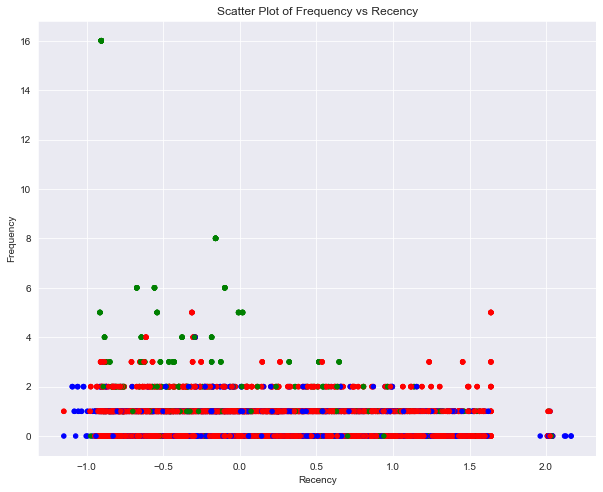

In [74]:
from matplotlib import pyplot as plt
import seaborn as sns

# Assuming the 'Cluster' column is already created by KMeans clustering

plt.figure(figsize=(10, 8))

# Define colors for clusters
Colors = ["red", "green", "blue"]

# Map cluster labels to colors
df_final_kmeans['Color'] = df_final_kmeans['Cluster'].map(lambda p: Colors[p])

# Create scatter plot for Frequency vs Recency
ax = df_final_kmeans.plot(
    kind="scatter", 
    x="Recency", 
    y="Frequency",
    c=df_final_kmeans['Color'],
    figsize=(10, 8)
)

# Add titles and labels
plt.title('Scatter Plot of Frequency vs Recency')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()


### Observations from the Scatter Plot
- The scatter plot shows the distribution of customers based on their Recency and Frequency values, colored by the clusters assigned by KMeans clustering.
- **Cluster Separation**: The plot indicates distinct clusters based on Recency and Frequency, with different colors representing each cluster.
- **Cluster Characteristics**:
- **Red Cluster**: Customers with low Recency and low Frequency values, indicating recent but infrequent interactions.
- **Green Cluster**: Customers with moderate Recency and Frequency values, suggesting regular interactions over time.
- **Blue Cluster**: Customers with high Recency and Frequency values, representing long-time and frequent interactions.
- **Cluster Overlap**: Some overlap between clusters, especially between the Red and Green clusters, indicating similarities in customer behavior.

### Interpretation

- **High Frequency, Recent Purchases**: Customers with high purchase frequency tend to buy recently (recency near or below zero).
- **Low Frequency Spread**: Low-frequency buyers are spread across the recency spectrum.
- **Cluster of Low Frequency**: Many customers have low frequency (1-2) with recent purchases.
- **High-Value Customers**: A few high-frequency, recent buyers are critical for the business.
- **Recommendation**: Focus on loyalty programs for frequent buyers, convert occasional buyers, and re-engage less recent customers.

### With RobustScaler Normalization:

- **Reduced Variance**: Normalization can reduce the variance that helps in distinguishing between clusters.
- **Effective for Outliers**: While RobustScaler is good for handling outliers, it might not always enhance cluster separation in all datasets.
- **Cluster Blending**: The red clusters, along with the others, appear less distinct. This blending suggests that scaling might mask some of the natural separation present in the data.


<Figure size 720x576 with 0 Axes>

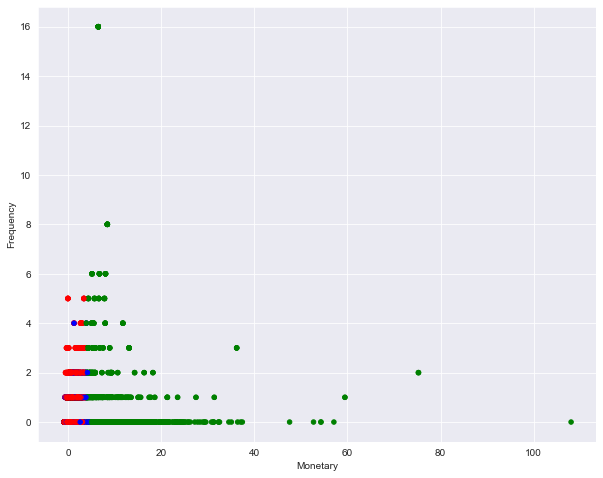

In [75]:
# Create scatter plot for Monetary vs Frequency
plt.figure(figsize=(10, 8))
ax = df_final_kmeans.plot(
    kind="scatter", 
    x="Monetary", 
    y="Frequency",
    c=df_final_kmeans['Color'],
    figsize=(10, 8)
)

### Observations :

- **High Frequency, Low Monetary**: Most frequent buyers have low monetary value.
- **Low Frequency, Varying Monetary**: Low-frequency buyers show a wide range of monetary values, including high spenders.
- **Recommendation**: Target high-spending, low-frequency buyers to increase purchase frequency.

<Figure size 720x576 with 0 Axes>

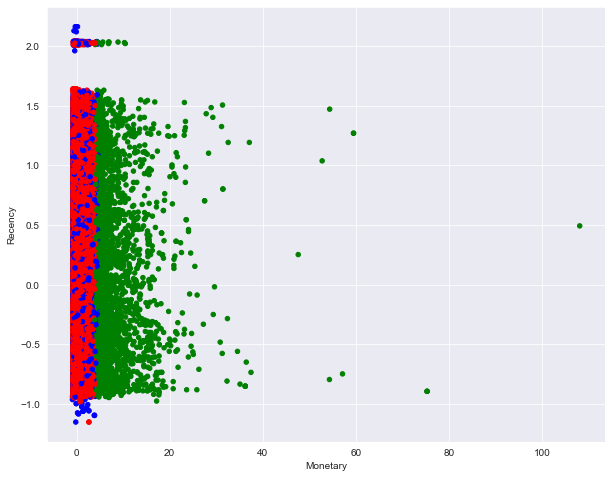

In [76]:
# Create scatter plot for Monetary vs Recency
plt.figure(figsize=(10, 8))
ax = df_final_kmeans.plot(
    kind="scatter", 
    x="Monetary", 
    y="Recency",
    c=df_final_kmeans['Color'],
    figsize=(10, 8)
)

### Interpretation

- High Monetary, Recent Purchases: Customers with high monetary value have recent purchases (low recency).

- Low Monetary Cluster: Most customers have low monetary value regardless of recency.

- Recommendation: Engage recent high spenders with personalized offers and target low monetary customers to increase spending.

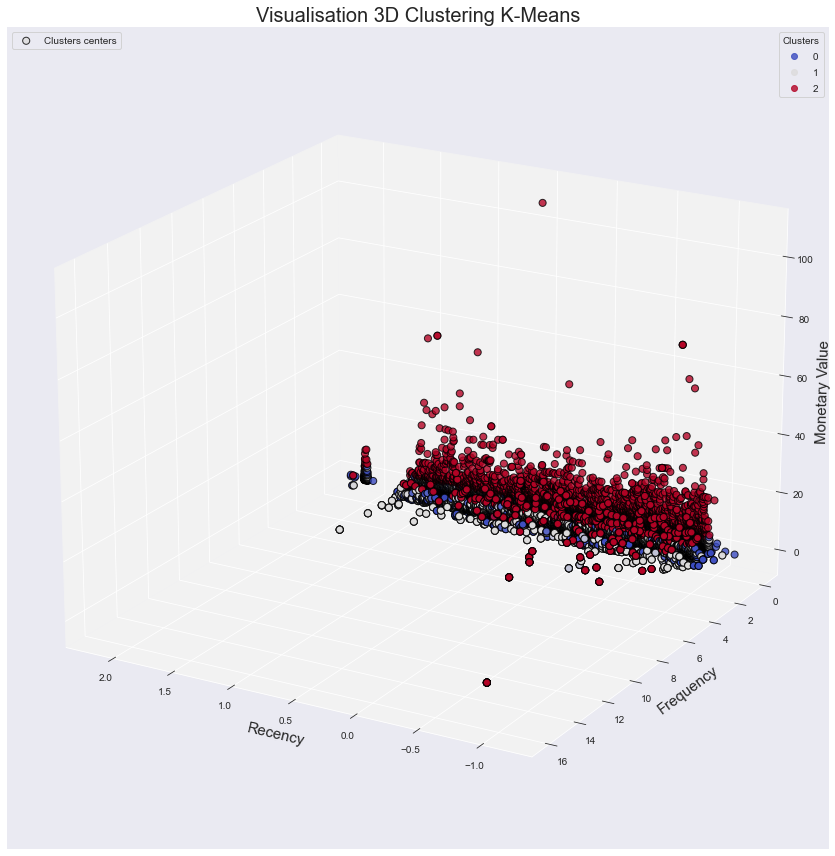

In [77]:
import pandas as pd
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


# Sélectionner les caractéristiques pour le clustering
features = ['Recency', 'Frequency', 'Monetary', 'avg_review_score', 'review_count', 'RFMScore']

# Appliquer KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_final_kmeans[features])

# Récupérer les centres des clusters et les étiquettes
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Visualisation 3D
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

# Créer un graphique de dispersion 3D des points de données colorés par cluster
scatter = ax.scatter(df_final_kmeans['Recency'], df_final_kmeans['Frequency'], df_final_kmeans['Monetary'], c=labels, cmap='coolwarm', edgecolor='k', s=50, alpha=0.8)
ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], cluster_centers[:, 2], marker='X', color='red', s=200, edgecolor='k', label='Clusters centers')

# Étiquettes et titre
ax.set_xlabel('Recency', fontsize=15)
ax.set_ylabel('Frequency', fontsize=15)
ax.set_zlabel('Monetary Value', fontsize=15)
ax.set_title('Visualisation 3D Clustering K-Means', fontsize=20)

# Améliorations
ax.grid(True)
ax.xaxis.set_pane_color((0.95, 0.95, 0.95, 1.0))
ax.yaxis.set_pane_color((0.95, 0.95, 0.95, 1.0))
ax.zaxis.set_pane_color((0.95, 0.95, 0.95, 1.0))
ax.view_init(elev=20, azim=120)  # Ajuster pour le meilleur angle

# Légende
legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)
ax.legend(['Clusters centers'], loc='upper left')

plt.tight_layout()
plt.show()


### Interpretation

- Cluster 0: Customers with low recency, high frequency, and moderate monetary value are likely loyal and engaged.
- Cluster 1: Customers with higher recency, lower frequency, and lower monetary value might need re-engagement.
- Cluster 2: Customers with varying recency and high monetary value suggest high-value but less frequent purchases.

### Recommendation

- Focus on retaining Cluster 0, re-engaging Cluster 1, and increasing frequency for Cluster 2.

### KMeans Clustering - Silhouette Score Method (Data Driven) with Robustscaler Normalisation of RFM   

- The Silhouette Score is a metric used to determine the optimal number of clusters in a dataset. It measures how similar an instance is to its own cluster compared to other clusters, calculated as:

- Silhouette Coefficient = (x - y)\max(x, y)

- where  y  is the mean intra-cluster distance and  x  is the mean nearest-cluster distance. The score ranges from -1 to 1, with values close to 1 indicating a well-clustered instance. Although computationally expensive, it provides clear and meaningful decisions on the optimal number of clusters.

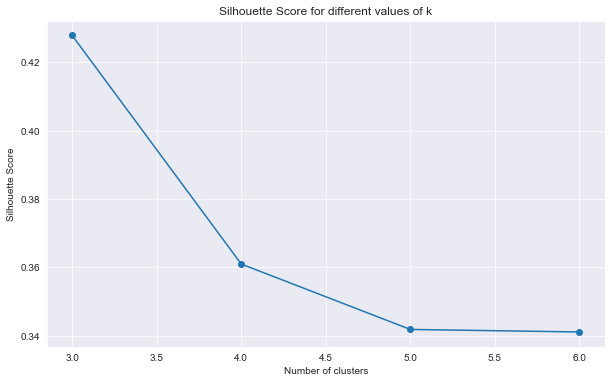

In [78]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Relative path to the data folder
db_path = os.path.join('..', 'data')

# Load df_final_kmeans
df_final_kmeans_path = os.path.join(db_path, 'df_final_kmeans.csv')
df_final_kmeans = pd.read_csv(df_final_kmeans_path)

# Select only numeric columns for KMeans clustering
numeric_features = ['Recency', 'Frequency', 'Monetary', 'avg_review_score', 'review_count', 'RFMScore']

# Ensure only numeric features are used
df_final_kmeans_numeric = df_final_kmeans[numeric_features]

# Calculate Silhouette Score
silhouette_scores = []
for K in range(3, 7):
    kmeans = KMeans(n_clusters=K, random_state=42)
    labels = kmeans.fit_predict(df_final_kmeans_numeric)
    silhouette_scores.append(silhouette_score(df_final_kmeans_numeric, labels))

plt.figure(figsize=(10, 6))
plt.plot(range(3, 7), silhouette_scores, marker='o')
plt.title('Silhouette Score for different values of k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


### Observations:
- The Silhouette Score method indicates that the optimal number of clusters is 3 for the given dataset.
- The plot shows the silhouette scores for different numbers of clusters ranging from 3 to 6. The highest silhouette score is at k=3k=3 with a score of approximately 0.42. This suggests that 3 clusters provide the best separation and cohesion in the data.

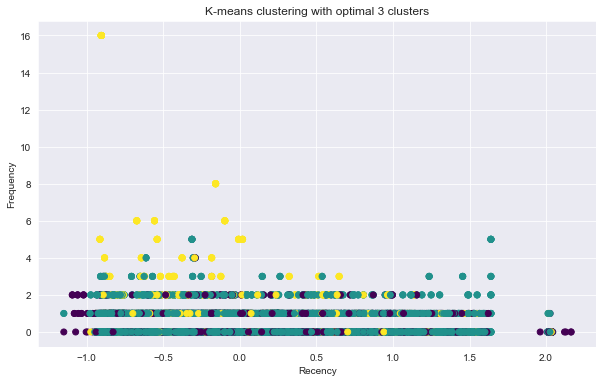

In [79]:
# Apply k-means with the optimal number of clusters (3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(df_final_kmeans_numeric)
df_final_kmeans['optimal_cluster'] = kmeans.labels_

# Visualize the optimal clusters
plt.figure(figsize=(10, 6))
plt.scatter(df_final_kmeans_numeric['Recency'], df_final_kmeans_numeric['Frequency'], c=df_final_kmeans['optimal_cluster'], cmap='viridis')
plt.title(f'K-means clustering with optimal {optimal_k} clusters')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()


### Observations from the Clustering Result

1. **Three Distinct Clusters**: The plot shows three distinct clusters as indicated by the different colors.
2. **Cluster Distribution**: One cluster (yellow) has a wider spread across the Frequency axis, indicating more variation in customer frequency.
3. **Overlapping Clusters**: There is some overlap between clusters, especially along the Recency axis near zero, suggesting similarities between some data points.
4. **Low Recency Dominance**: Most data points are concentrated around lower Recency values, indicating that many customers have interacted with the business recently.
5. **Cluster Density**: The majority of the points in the lower Frequency and low to mid Recency range are densely packed, showing a high concentration of customers in this segment.

### DBSCAN Clustering (Data Driven)

            Recency     Frequency      Monetary  avg_review_score  \
count  99441.000000  99441.000000  99441.000000      99441.000000   
mean       0.371691      0.004951      0.012634          0.773462   
std        0.198498      0.024760      0.017755          0.335862   
min        0.000000      0.000000      0.000000          0.000000   
25%        0.211140      0.000000      0.004691          0.750000   
50%        0.347150      0.000000      0.008155          1.000000   
75%        0.512953      0.000000      0.013873          1.000000   
max        1.000000      1.000000      1.000000          1.000000   

       review_count      RFMScore  
count  99441.000000  99441.000000  
mean       0.002770      0.640823  
std        0.037386      0.208723  
min        0.000000      0.000000  
25%        0.000000      0.555556  
50%        0.000000      0.666667  
75%        0.000000      0.777778  
max        1.000000      1.000000  


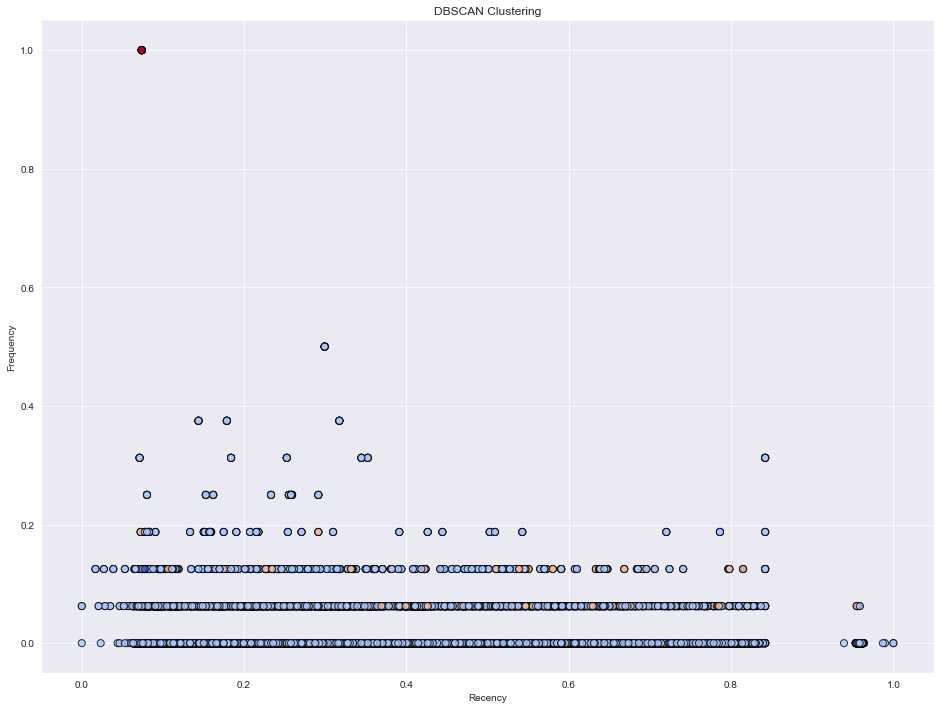

In [80]:
import os
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Relative path to the data folder
db_path = os.path.join('..', 'data')

# Load df_final_dbscan
df_final_dbscan_path = os.path.join(db_path, 'df_final_dbscan.csv')
df_final_dbscan = pd.read_csv(df_final_dbscan_path)

# Select only numeric columns for DBSCAN clustering
numeric_features = ['Recency', 'Frequency', 'Monetary', 'avg_review_score', 'review_count', 'RFMScore']

# Ensure only numeric features are used
df_final_dbscan_numeric = df_final_dbscan[numeric_features]

# Analyze the data to understand its scale
print(df_final_dbscan_numeric.describe())

# Perform DBSCAN clustering with optimized parameters
dbscan = DBSCAN(eps=0.3, min_samples=10)  # Adjusted eps and min_samples for better performance
dbscan.fit(df_final_dbscan_numeric)

# Find the clusters for the observations given in the dataset
df_final_dbscan['Cluster'] = dbscan.labels_

# Display the first 10 rows of the dataframe to check the clustering result
df_final_dbscan.head(10)

# Plotting the clusters
plt.figure(figsize=(16, 12))  # Increased figure size for better visibility
plt.scatter(df_final_dbscan_numeric['Recency'], df_final_dbscan_numeric['Frequency'], c=df_final_dbscan['Cluster'], cmap='coolwarm', edgecolor='k', s=50, alpha=0.8)
plt.title('DBSCAN Clustering')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()


### Observations :

1. **Low Interaction Frequency**: Most users interact infrequently, as indicated by the mean Frequency of 0.004951 and the 75th percentile being 0.
2. **Recent User Activity**: Users' last interactions are somewhat recent, with a mean Recency of 0.371691 and significant variability (std 0.198498).
3. **Small Monetary Values**: Transactions or engagements are generally small in value, with a mean Monetary of 0.012634.
4. **Few Reviews with High Scores**: While review scores are high (mean 0.773462), very few users leave reviews (mean review_count of 0.002770).
5. **Dense Core with Outliers**: DBSCAN clustering shows a dense core cluster with some outliers, indicating common patterns among the majority and significant deviations for a few.
6. **Parameter Sensitivity**: Few clusters were identified, showing DBSCAN's sensitivity to `eps=0.3` and `min_samples=10`.
7. **Frequent, Recent Interactions**: The core cluster suggests frequent but recent user interactions.


### Business-Oriented Clustering Approach
- A business-oriented clustering approach involves incorporating domain-specific knowledge and business objectives into the clustering process. This method goes beyond purely data-driven techniques to ensure the clusters are meaningful and actionable from a business perspective. Here’s how we can proceed:

1. **Create a Composite RFM Score**: Combines Recency, Frequency, and Monetary values into a single metric.
   - **Justification**: Simplifies analysis by summarizing key aspects of customer behavior.

2. **Weight RFM Components**: Uses weights (0.15 Recency, 0.28 Frequency, 0.57 Monetary) based on business insights.
   - **Justification**: Emphasizes the most critical factor, Monetary value, in determining customer value.

### Calculate revenue-based weights for RFM components
- Revenue is calculated as the product of frequency and average monetary value, reflecting an estimate of the total value generated by a customer. This method is a simplification based on the idea that purchase frequency and average monetary value are the primary determinants of revenue. It allows the introduction of an important business variable (Revenue) into the model without requiring detailed transactional data for each customer. Although simplified, this approach provides a good approximation of customer value based on available data. The weights for Recency, Frequency, and Monetary are calculated based on the revenue contribution of each component to the total revenue.

In [81]:
import os
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Relative path to the data folder
db_path = os.path.join('..', 'data')

# Load df_final_kmeans
df_final_kmeans_path = os.path.join(db_path, 'df_final_kmeans.csv')
df_final_kmeans = pd.read_csv(df_final_kmeans_path)

# Ensure the necessary columns exist
required_columns = ['Recency', 'Frequency', 'Monetary']  # Assuming 'Revenue' is your business outcome
missing_columns = [col for col in required_columns if col not in df_final_kmeans.columns]
if missing_columns:
    raise ValueError(f"Missing columns in the dataset: {missing_columns}")

# Add a new column 'Revenue' to the DataFrame
df_final_kmeans['Revenue'] = df_final_kmeans['Frequency'] * df_final_kmeans['Monetary']

# Define the features (R, F, M) and target (Revenue)
X = df_final_kmeans[['Recency', 'Frequency', 'Monetary']]
y = df_final_kmeans['Revenue']

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the coefficients
coefficients = model.coef_

# Normalize the coefficients to sum up to 1
weights = coefficients / np.sum(coefficients)

# Display the calculated weights
weight_recency, weight_frequency, weight_monetary = weights
print(f"Weight for Recency: {weight_recency:.2f}")
print(f"Weight for Frequency: {weight_frequency:.2f}")
print(f"Weight for Monetary: {weight_monetary:.2f}")


Weight for Recency: -0.01
Weight for Frequency: 0.95
Weight for Monetary: 0.06


In [82]:
df_final_kmeans.head()

,customer_unique_id,index_order,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,index_customer,customer_zip_code_prefix,customer_city,customer_state,avg_review_score,review_count,total_payment_value,payment_count,payment_types,total_price,item_count,product_categories,avg_product_weight_g,avg_product_length_cm,avg_product_height_cm,avg_product_width_cm,days_to_approval,days_in_transit,days_to_delivery,days_early_or_late,Recency,Frequency,Monetary,R,F,M,RFMScore,RFMLevel_Loyal,RFMLevel_Needs Attention,RFMLevel_Potential Loyalists,RFMLevel_Promising,RFMLevel_Require Activation,RFMGroup_112,RFMGroup_113,RFMGroup_114,RFMGroup_141,RFMGroup_142,RFMGroup_143,RFMGroup_144,RFMGroup_211,RFMGroup_212,RFMGroup_213,RFMGroup_214,RFMGroup_241,RFMGroup_242,RFMGroup_243,RFMGroup_244,RFMGroup_311,RFMGroup_312,RFMGroup_313,RFMGroup_314,RFMGroup_341,RFMGroup_342,RFMGroup_343,RFMGroup_344,RFMGroup_411,RFMGroup_412,RFMGroup_413,RFMGroup_414,RFMGroup_441,RFMGroup_442,RFMGroup_443,RFMGroup_444,Revenue
0,7c396fd4830fd04220f754e42b4e5bff,0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,70296,3149,sao paulo,SP,-1.0,0.0,38.71,3.0,"credit_card, voucher",29.99,1.0,utilidades_domesticas,500.0,19.0,8.0,13.0,0,2,6,-8,0.480687,1.0,-0.228041,3,1,3,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.228041
1,af07308b275d755c9edb36a90c618231,1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,77027,47813,barreiras,BA,-1.0,0.0,141.46,1.0,boleto,118.70,1.0,perfumaria,400.0,19.0,13.0,19.0,1,0,12,-6,-0.789700,0.0,0.239359,1,4,2,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,3a653a41f6f9fc3d2a113cf8398680e8,2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,554,75265,vianopolis,GO,0.0,0.0,179.12,1.0,credit_card,159.90,1.0,automotivo,420.0,24.0,19.0,21.0,0,0,9,-18,-0.849785,0.0,0.539535,1,4,2,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,7c142cf63193a1473d2e66489a9ae977,3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,61081,59296,sao goncalo do amarante,RN,0.0,0.0,72.20,1.0,credit_card,45.00,1.0,pet_shop,450.0,30.0,10.0,20.0,0,3,9,-13,0.274678,0.0,-0.312689,3,4,3,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000
4,72632f0f9dd73dfee390c9b22eb56dd6,4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,67263,9195,santo andre,SP,0.0,0.0,28.62,1.0,credit_card,19.90,1.0,papelaria,250.0,51.0,15.0,15.0,0,0,1,-10,-0.098712,0.0,-0.660051,2,4,4,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000


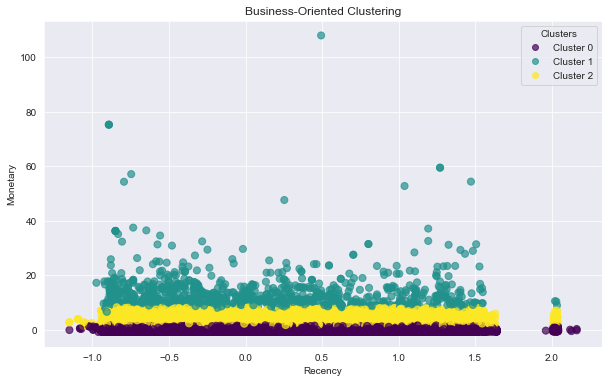

         NumCustomers  TotalRevenue  Frequency   Recency
Cluster                                                 
0               87994   1790.037940   0.047594  0.080624
1                1060  13910.532680   0.645283  0.052980
2               10387  32812.124582   0.289400  0.090025


In [83]:
import os
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Relative path to the data folder
db_path = os.path.join('..', 'data')

# Load df_final_kmeans
df_final_kmeans_path = os.path.join(db_path, 'df_final_kmeans.csv')
df_final_kmeans = pd.read_csv(df_final_kmeans_path)

# Ensure the necessary columns exist
required_columns = ['Recency', 'Frequency', 'Monetary', 'customer_unique_id']
missing_columns = [col for col in required_columns if col not in df_final_kmeans.columns]
if missing_columns:
    raise ValueError(f"Missing columns in the dataset: {missing_columns}")

# Define RFM features based on business logic
df_final_kmeans['RFMScore'] = df_final_kmeans['Recency'] * 0.15 + df_final_kmeans['Frequency'] * 0.28 + df_final_kmeans['Monetary'] * 0.57

# Select relevant features for clustering
features = ['Recency', 'Frequency', 'Monetary', 'RFMScore']
X = df_final_kmeans[features]

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_final_kmeans['Cluster'] = kmeans.fit_predict(X)

# Save the DataFrame with the 'Cluster' column to a new CSV file
output_path = os.path.join(db_path, 'df_final_kmeans_with_clusters.csv')
df_final_kmeans.to_csv(output_path, index=False)

# Analyze and visualize clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_final_kmeans['Recency'], df_final_kmeans['Monetary'], c=df_final_kmeans['Cluster'], cmap='viridis', s=50, alpha=0.7)
plt.title('Business-Oriented Clustering')
plt.xlabel('Recency')
plt.ylabel('Monetary')
# Create a legend
handles, labels = scatter.legend_elements()
legend_labels = [f'Cluster {i}' for i in range(len(handles))]
plt.legend(handles, legend_labels, title="Clusters")
plt.show()

# Validate clusters with business metrics
cluster_summary = df_final_kmeans.groupby('Cluster').agg({
    'customer_unique_id': 'count',
    'Monetary': 'sum',
    'Frequency': 'mean',
    'Recency': 'mean'
}).rename(columns={'customer_unique_id': 'NumCustomers', 'Monetary': 'TotalRevenue'})
print(cluster_summary)


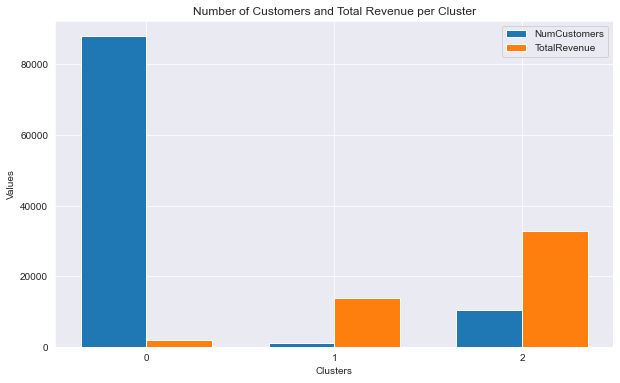

In [84]:
import matplotlib.pyplot as plt
import numpy as np

# Create a new DataFrame for cluster summary
cluster_summary = df_final_kmeans.groupby('Cluster').agg({
    'customer_unique_id': 'count',
    'Monetary': 'sum',
    'Frequency': 'mean',
    'Recency': 'mean'
}).rename(columns={'customer_unique_id': 'NumCustomers', 'Monetary': 'TotalRevenue'})

# Plot the data
fig, ax1 = plt.subplots(figsize=(10, 6))

# Define the position of bars on the X-axis
bar_width = 0.35
index = np.arange(cluster_summary.shape[0])

# Create bars for NumCustomers and Total Revenue
bars1 = ax1.bar(index, cluster_summary['NumCustomers'], bar_width, label='NumCustomers')
bars2 = ax1.bar(index + bar_width, cluster_summary['TotalRevenue'], bar_width, label='TotalRevenue')

# Add titles and labels
ax1.set_xlabel('Clusters')
ax1.set_ylabel('Values')
ax1.set_title('Number of Customers and Total Revenue per Cluster')
ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(cluster_summary.index)

# Add legend
ax1.legend()

# Show the plot
plt.show()


### Observations from Clustering Results

1. **Cluster Distribution**:
   - **Cluster 0**: Largest group with 87,994 customers, but contributes the least to revenue.
   - **Cluster 1**: Smallest group with 1,060 customers, but has the highest frequency of interactions.
   - **Cluster 2**: Moderate size with 10,387 customers, generating the highest total revenue.

2. **Customer Behavior**:
   - **Cluster 0**: Low engagement and recent activity; likely low-value customers.
   - **Cluster 1**: High engagement and recent activity; potential loyal customers.
   - **Cluster 2**: Moderate engagement, contributing significantly to revenue; important for business.

3. **Revenue Insight**:
   - Focus on **Cluster 2** for revenue growth and **Cluster 1** for maintaining loyalty.


### Conclusion
- In this notebook, we explored two clustering methods, KMeans and DBSCAN, to segment customers based on their behavior and interactions with an e-commerce platform. We applied both data-driven and business-oriented approaches to identify meaningful customer segments and provide actionable insights for business strategies.
- The clustering results revealed distinct customer groups with varying levels of engagement, recency, and monetary value. By analyzing these clusters, businesses can tailor marketing campaigns, retention strategies, and customer service efforts to meet the specific needs of each segment.
- The combination of data-driven clustering techniques and domain-specific knowledge enables businesses to derive valuable insights from customer data, optimize marketing efforts, and enhance customer relationships.
- Domain-specific clustering approaches, such as the RFM-based clustering with weighted scores, provide a more nuanced understanding of customer behavior and preferences, leading to more effective business decisions and improved revenue generation.